In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'y']
print(len(columns))
adult_data_df = pd.read_csv("../data/raw/adult/adult.data", names=columns)
adult_data_df = adult_data_df.replace(' ?', None)
adult_data_df.isna().sum()

15


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
y                    0
dtype: int64

In [18]:
df = pd.DataFrame(adult_data_df['workclass'].value_counts())
df

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [2]:
def plot_bars(df, column, figsize=(20, 6)):
    tmp_df = pd.DataFrame(df[column].value_counts())
    f, ax = plt.subplots(figsize=figsize)
    sns.barplot(tmp_df, x=column, y='count', label="Total")
    plt.savefig(f"../reports/figures/stage-1/adult-{column}.eps",format='eps', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


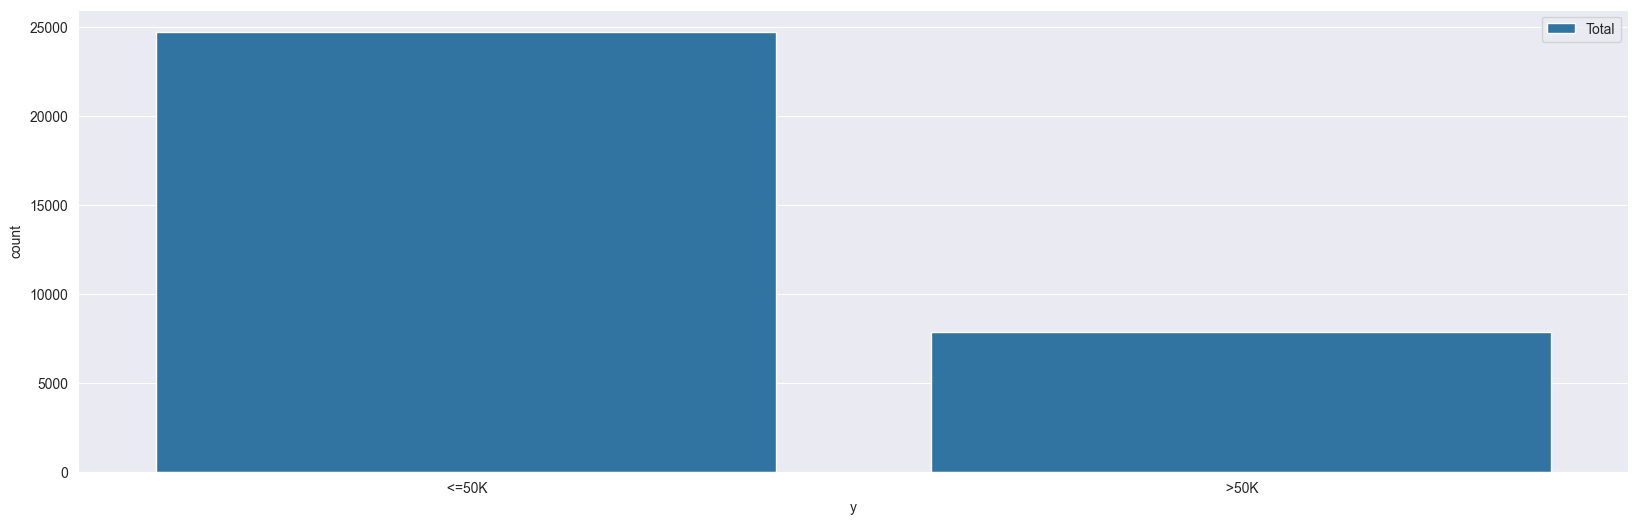

In [3]:
plot_bars(adult_data_df, 'y')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


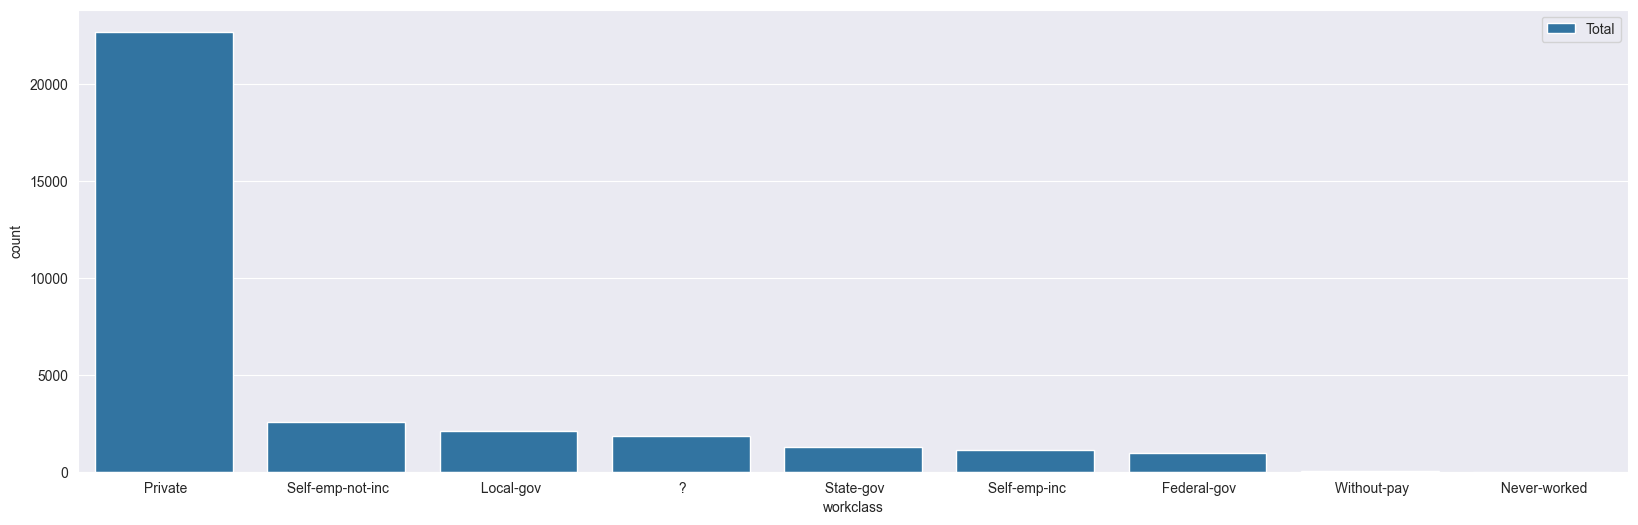

In [4]:
plot_bars(adult_data_df, 'workclass')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


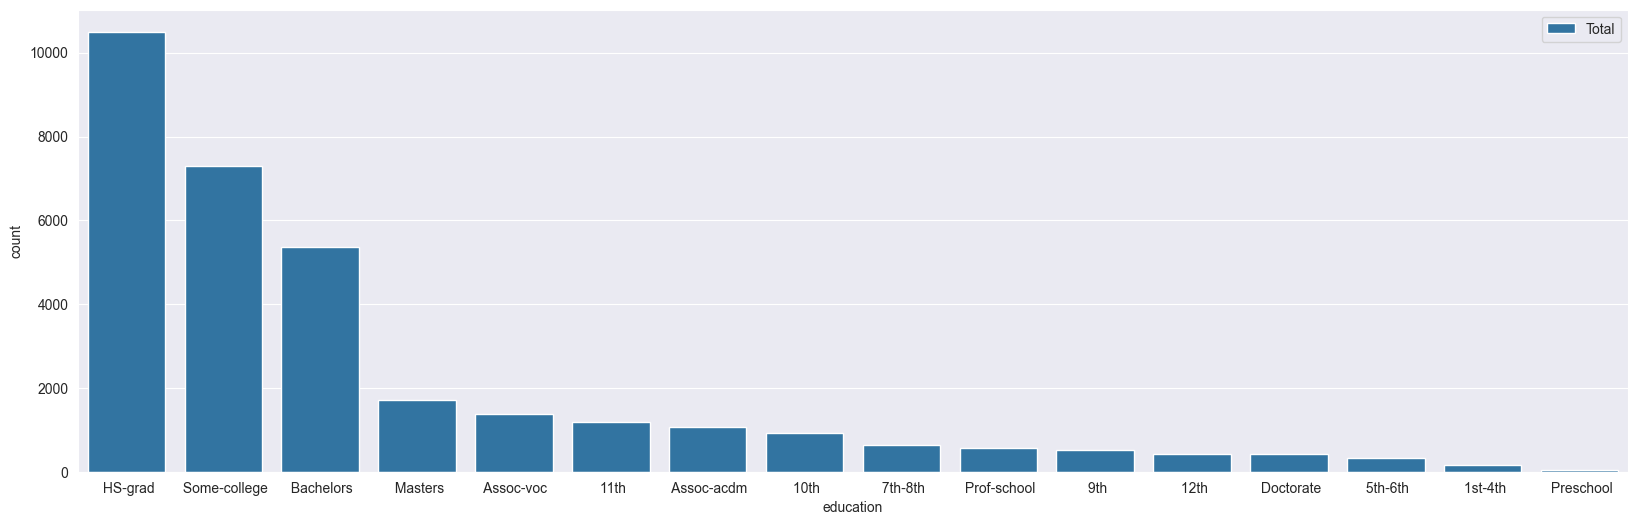

In [5]:
plot_bars(adult_data_df, 'education')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


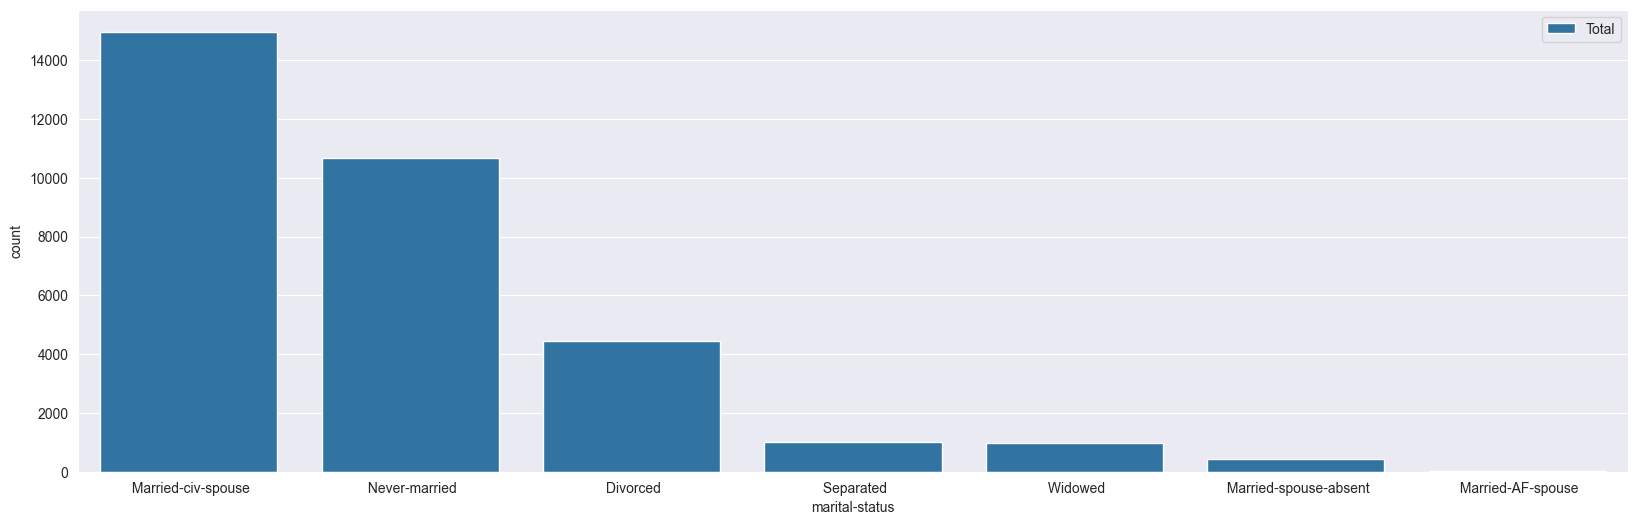

In [6]:
plot_bars(adult_data_df, 'marital-status')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


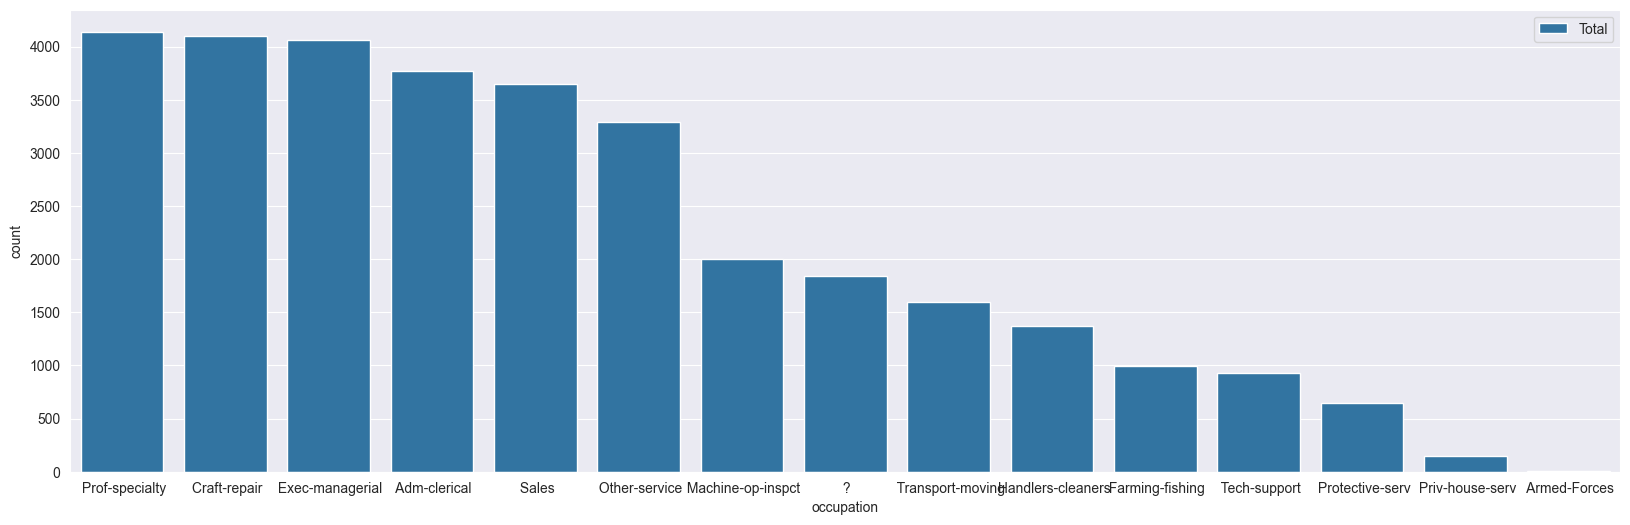

In [7]:
plot_bars(adult_data_df, 'occupation')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


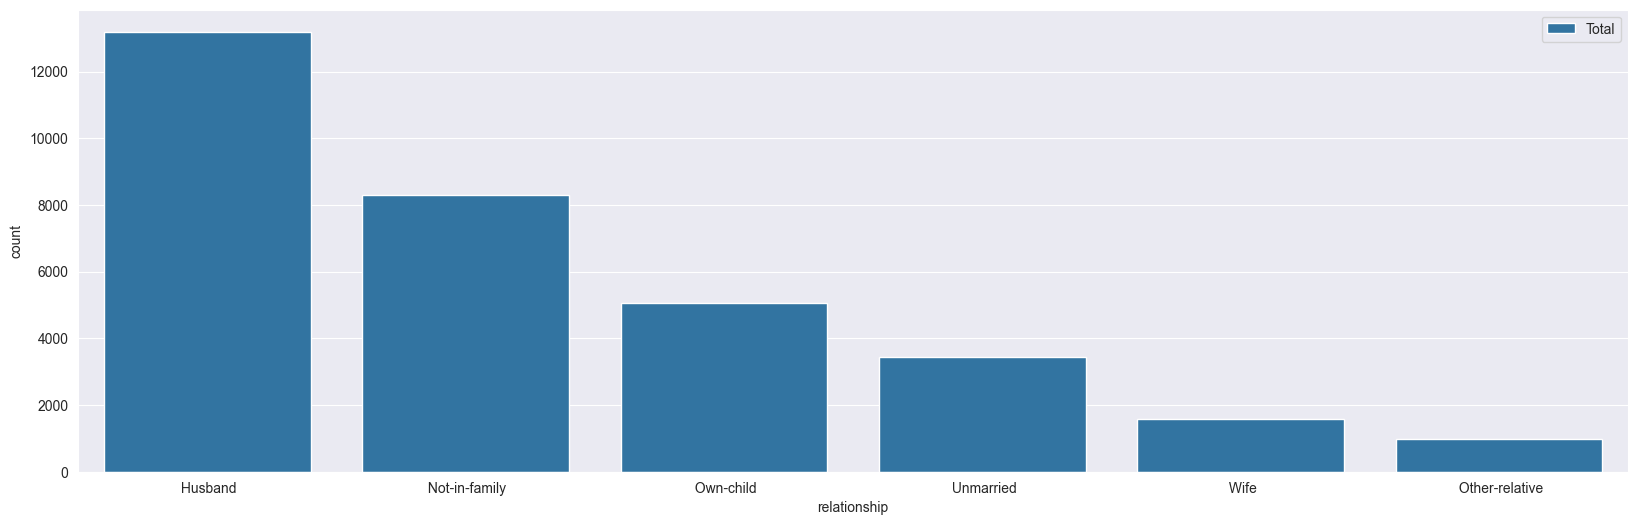

In [8]:
plot_bars(adult_data_df, 'relationship')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


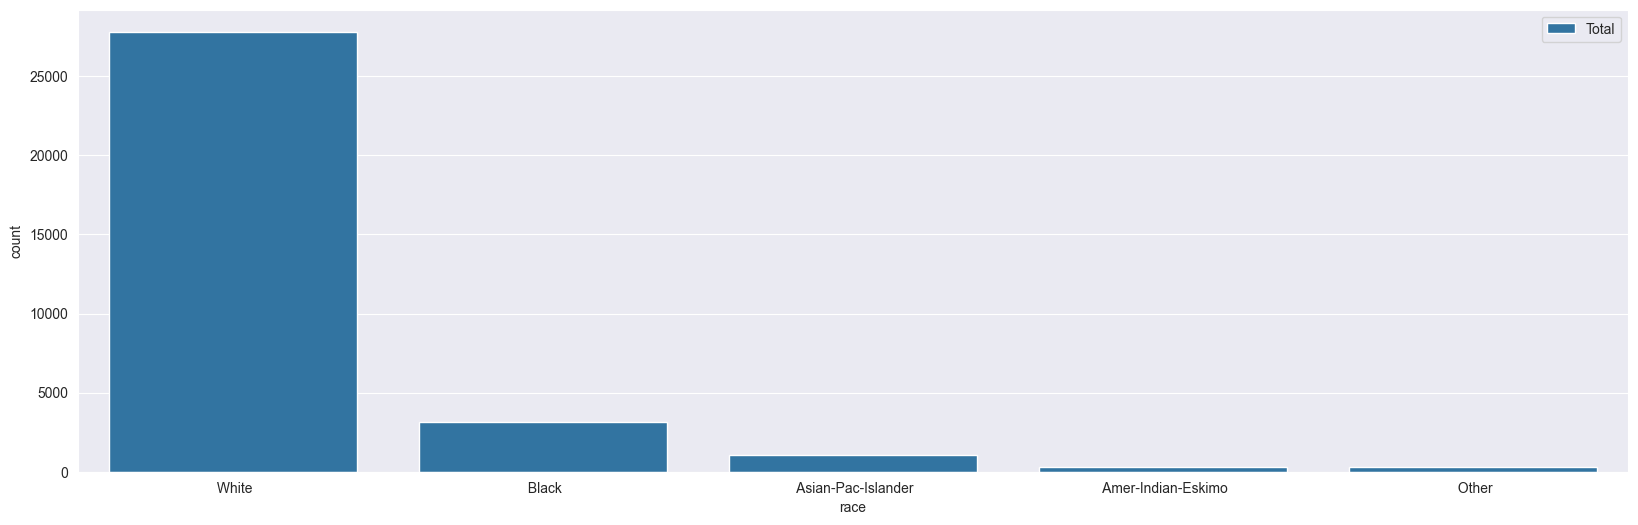

In [9]:
plot_bars(adult_data_df, 'race')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


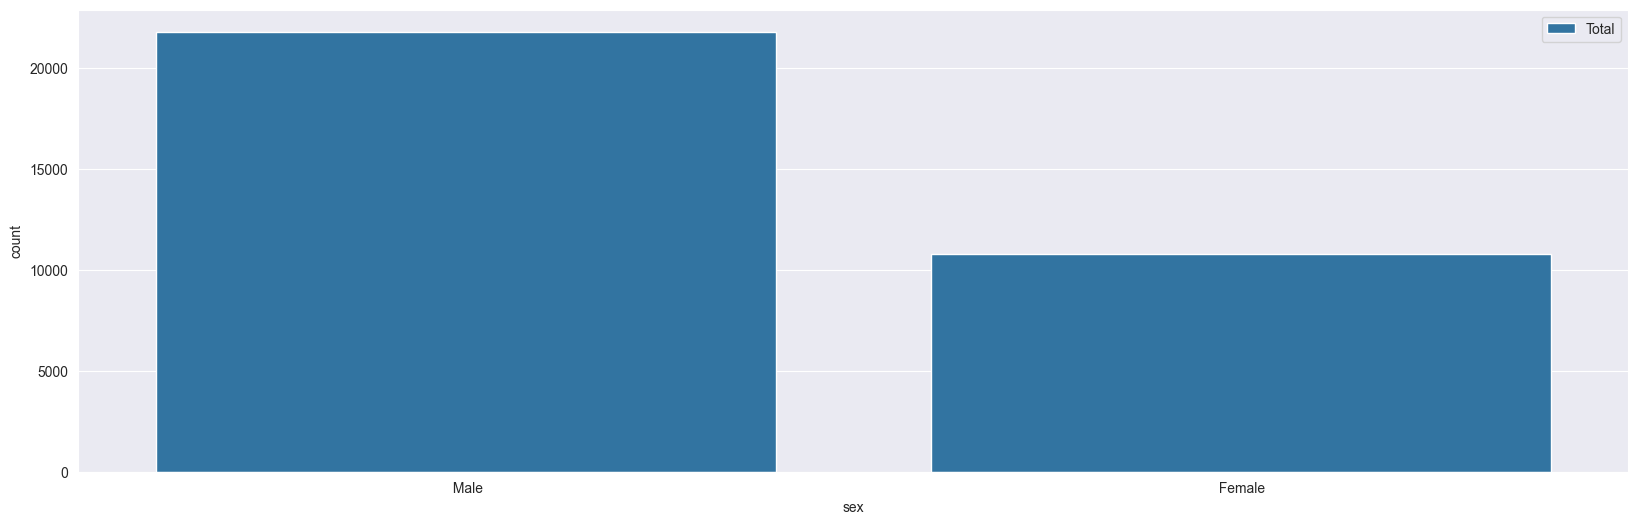

In [10]:
plot_bars(adult_data_df, 'sex')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


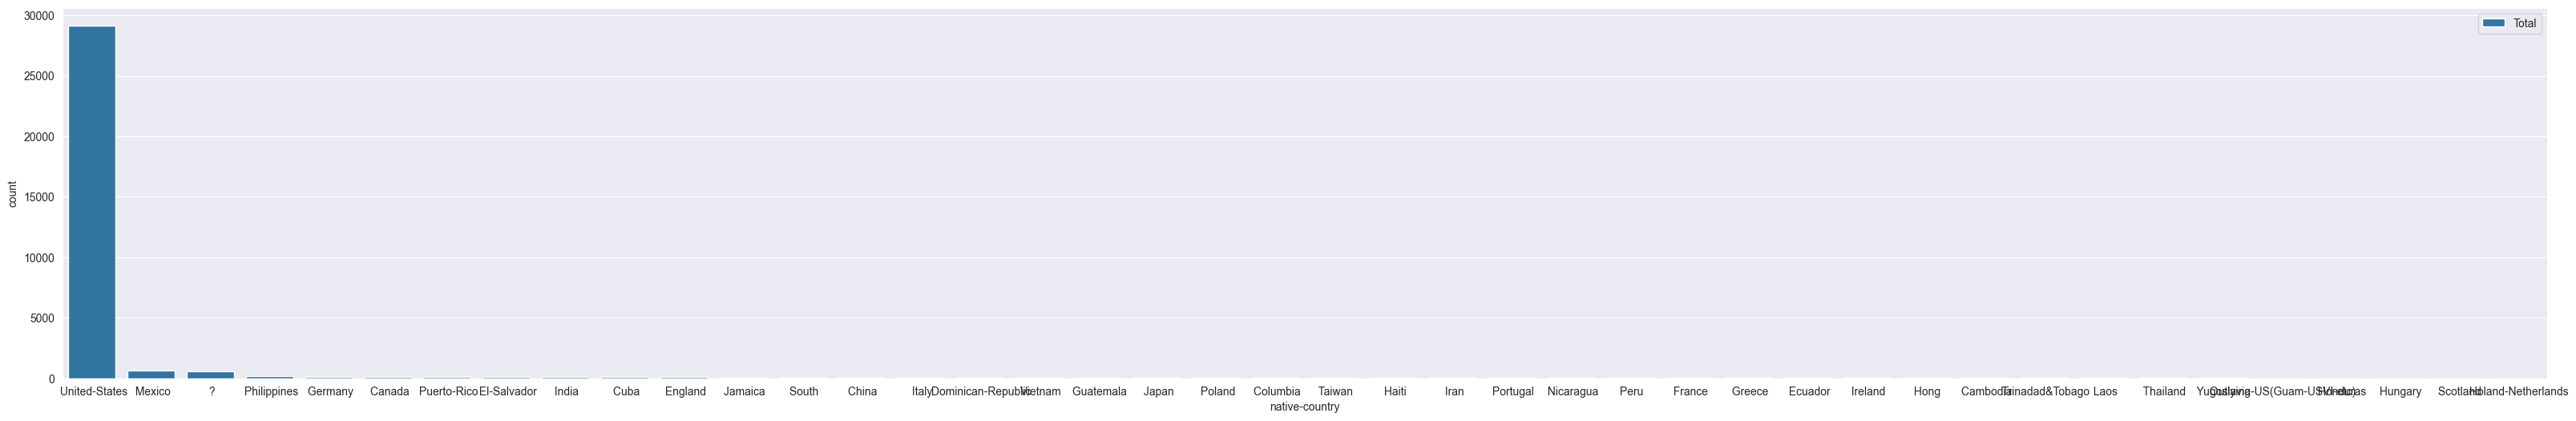

In [11]:
plot_bars(adult_data_df, 'native-country', figsize=(40, 6))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


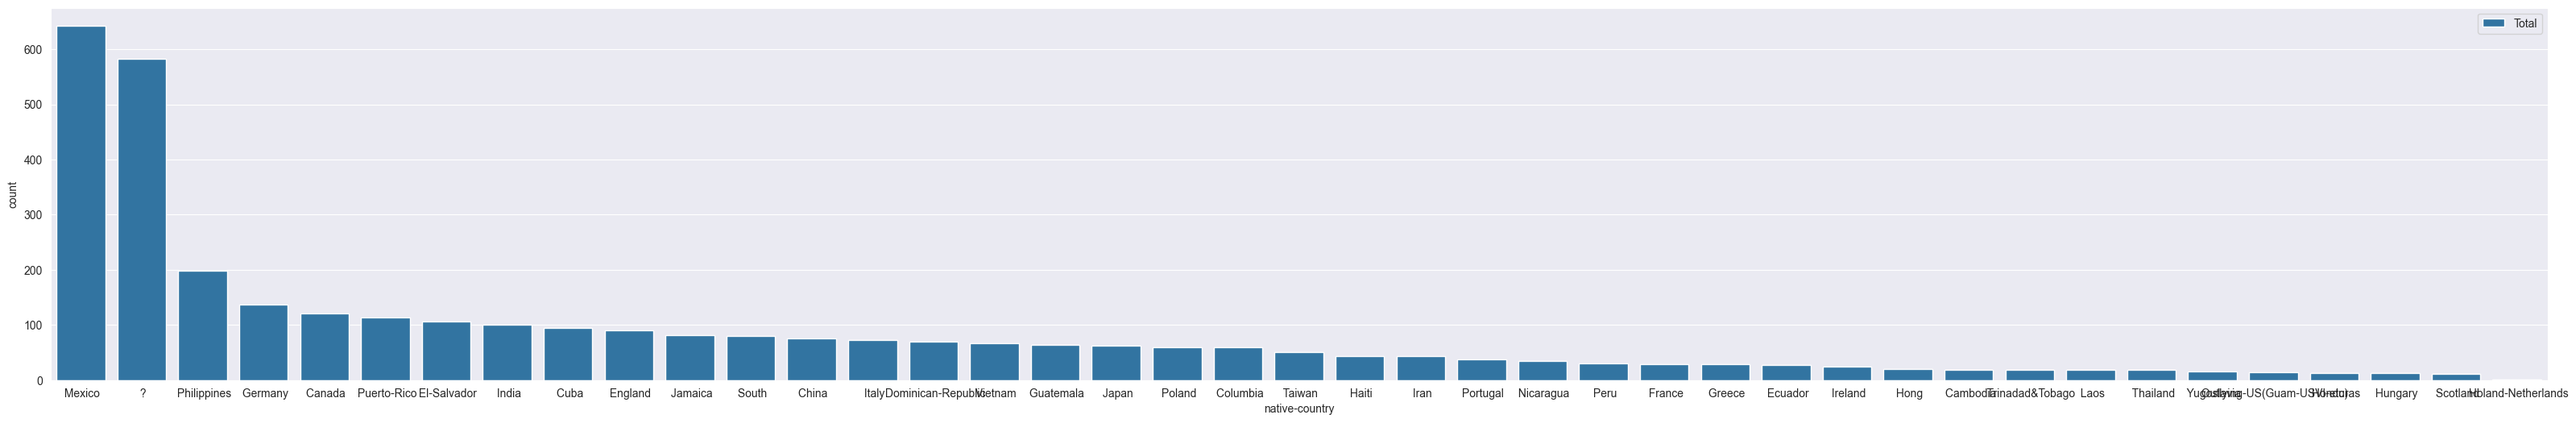

In [12]:
plot_bars(adult_data_df[adult_data_df['native-country'] != ' United-States'], 'native-country', figsize=(40, 6))

## Correlations


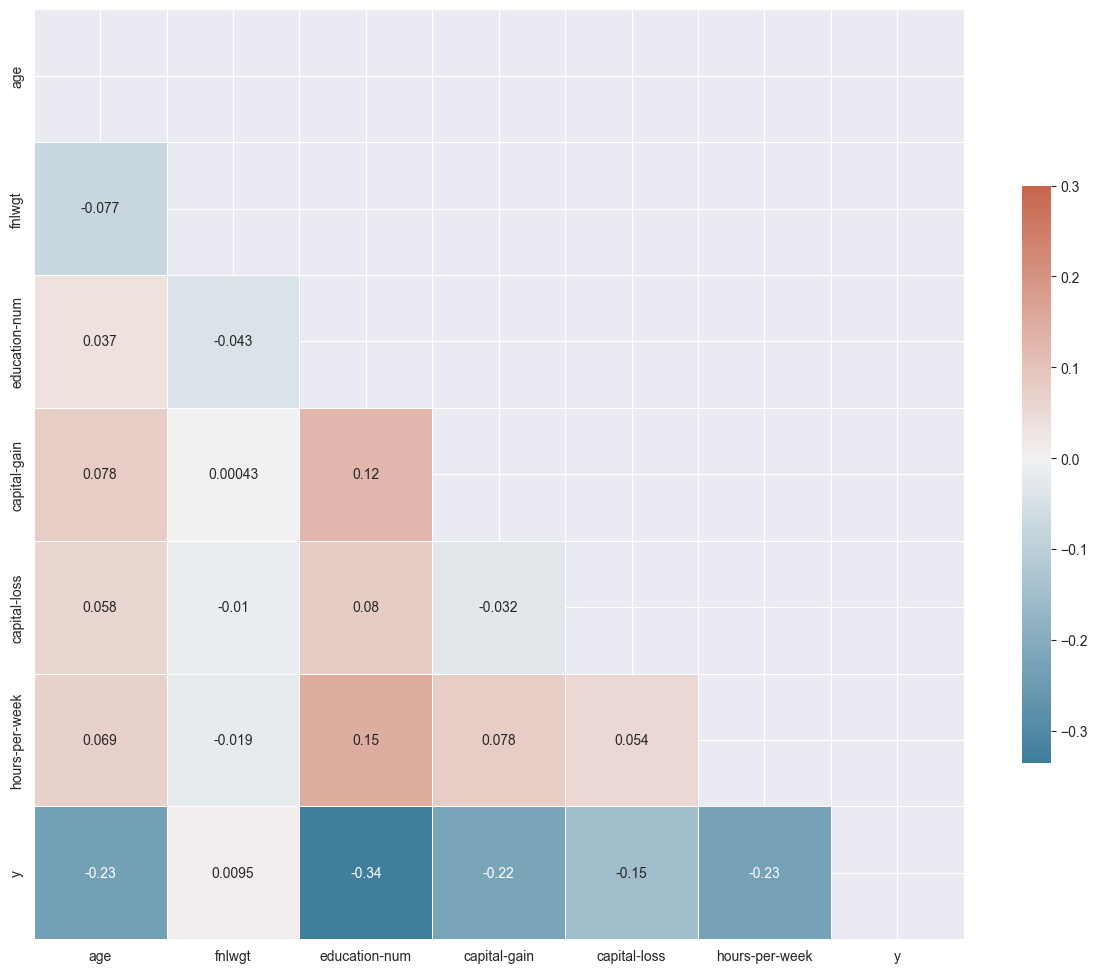

In [13]:
numerical_df = adult_data_df.drop(columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
numerical_df['y'] = numerical_df['y'].map(lambda col: int(col == ' <=50K'))
corr = numerical_df.corr()

f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True, mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig(f"../reports/figures/stage-1/adult-correlations.eps",format='eps', dpi=300)